<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import cobra
import cofactors
import matplotlib.pyplot as pp
import matplotlib as mp
import seaborn as sb
from pathlib import Path

In [2]:
km_folder = Path("../generated_data/")
sabio_files = (km_folder / "sabiork_queries").glob("*")
brenda_files = (km_folder / "brenda_queries").glob("*")
kms_sabio = cofactors.read_sabiork(sabio_files)
kms_brenda = cofactors.read_brenda(brenda_files)

In [3]:
mitocore_file = Path("../external_data/mitocore/mitocore_v1.01.xml")
mappings = cofactors.create_mappings_ec_mitocore_from_xml(
    str(mitocore_file), verbose=True
)
# mappings are always 1:1
mappings = {y[0]: x for x, y in mappings.items()}

No mapping found for AMCOXO
No mapping found for AMCOXO2_MitoCore
No EC annotation in reaction NADHt_MitoCore
No EC annotation in reaction NADt_MitoCore
No EC annotation in reaction NADHtm_MitoCore
No EC annotation in reaction NADtm_MitoCore
NAD found in 108 reactions:
['GAPD', 'LDH_L', 'G6PDH2r', 'GND', 'PDHm', 'ICDHxm', 'ICDHyrm', 'AKGDm', 'MDHm', 'CI_MitoCore', 'ME2m', 'ME1m', 'NNT_MitoCore', 'ME2', 'ICDHy', 'MDH', 'G3PD1', 'MECR16C_MitoCore', 'MTPC16_MitoCore', 'MECR14C_MitoCore', 'MTPC14_MitoCore', 'r0638', 'r0722', 'r0735', 'r0726', 'r0633', 'r0730', 'r0791', 'r0733', 'HACD1m', 'r0691', 'r0682', 'r0761', 'r0763', 'r0694', 'r0765', 'r0692', 'r0767', 'r0769', 'r0712', 'r0701', 'r0771', 'r0696', 'r0773', 'BDHm', 'OIVD1m', 'OIVD3m', 'HACD9m', 'OIVD2m', 'HIBDm', 'MMSAD1m', 'r1154', '2HBO', 'MCLOR', 'KYN3OX', 'r0645', 'AMCOXO', 'AMCOXO2_MitoCore', '2OXOADOXm', 'SACCD3m', 'r0525', 'AASAD3m', 'R03103_MitoCore', '1PPDCRc_MitoCore', '1PPDCRc_NADPH_MitoCore', 'r0594', 'r0074', 'G5SDym', 'P5

In [4]:
kms_brenda['reactions'] = kms_brenda.ec.apply(lambda x: mappings.get(x, None))
kms_sabio['reactions'] = kms_sabio.ec.apply(lambda x: mappings.get(x, None))

In [5]:
kms_brenda = kms_brenda[kms_brenda.value > 0.]
kms_sabio = kms_sabio[kms_sabio.value > 0.]

In [6]:
model = cobra.io.read_sbml_model(str(mitocore_file))

Model does not contain SBML fbc package information.


Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-27


SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_c "10-Formyltetrahydrofolate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_10fthf_m "10-Formyltetrahydrofolate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_10fthf_m "10-Formyltetrahydrofolate">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_13dpg_c "3-Phospho-D-glyceroyl phosphate">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_13dpg_c "3-Phospho-D-glyceroyl phosphate">
Use of CHARGE in the notes element is discouraged, use fbc:charge in

Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cmp_m "CMP">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_cmusa_c "2-Amino-3-carboxymuconate semialdehyde">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_cmusa_c "2-Amino-3-carboxymuconate semialdehyde">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_co_c "CO">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_co_c "CO">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_co_e "CO">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_co_e "CO">
Use of CHARGE in the notes element is discouraged, use fbc:charge instead: <Species M_co2_c "CO2">
Use of FORMULA in the notes element is discouraged, use fbc:chemicalFormula instead: <Species M_co2_c 

In [7]:
def map_comp(r):
    if not r:
        return 'not in model'
    rxn = model.reactions.get_by_id(r)
    c = rxn.compartments
    if len(c) > 1:
        return 'both'
    elif len(c) == 1:
        return list(c)[0].lower()
    else:
        return 'none given'

In [8]:
kms_brenda['compartments'] = kms_brenda.reactions.map(map_comp)
kms_sabio['compartments'] = kms_sabio.reactions.map(map_comp)

In [9]:
sb.set(
    font_scale = 1.1,
    style = 'whitegrid'
)

In [10]:
kms_brenda.reset_index(inplace=True)
kms_sabio.reset_index(inplace=True)

In [11]:
img_path = Path('../images/supplements')
img_path.mkdir(parents=True, exist_ok=True)

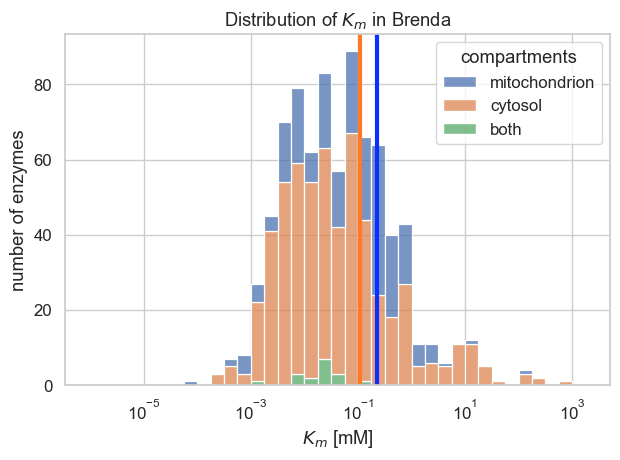

In [12]:
ax = sb.histplot(
    data = kms_brenda,
    stat = 'count',
    hue = 'compartments',
    x = 'value',
    binwidth=.25, 
    log_scale=(10,0),
    multiple='stack',
    hue_order = ['mitochondrion','cytosol', 'both']
)
ax.set_xlabel('$K_m$ [mM]')
ax.set_ylabel('number of enzymes')
ax.set_title('Distribution of $K_m$ in Brenda')
handles, labels = ax.get_legend_handles_labels()
fig = ax.get_figure()
# line mito
ax.axvline(.23, color='#0831ff', linewidth=3.)
# line cyto
ax.axvline(.11, color='#ff792b', linewidth=3.)
pp.tight_layout()
fig.savefig(img_path / 'kms_brenda.svg', transparent=True)

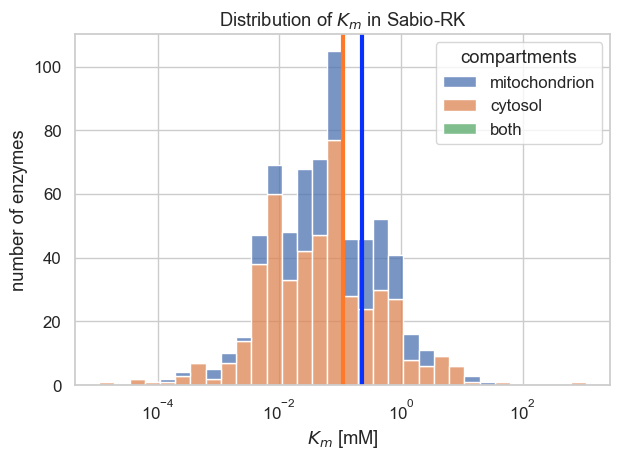

In [13]:
ax = sb.histplot(
    data = kms_sabio,
    hue = 'compartments',
    x = 'value',
    binwidth=.25, 
    log_scale=(10,0),
    multiple='stack',
    hue_order = ['mitochondrion','cytosol', 'both'],
)
ax.set_xlabel('$K_m$ [mM]')
ax.set_ylabel('number of enzymes')
ax.set_title('Distribution of $K_m$ in Sabio-RK')
fig = ax.get_figure()
# line mito
ax.axvline(.23, color='#0831ff', linewidth=3.,)
# line cyto
ax.axvline(.11, color='#ff792b', linewidth=3.,)
pp.tight_layout()
fig.savefig(img_path / 'kms_sabiork.svg', transparent=True)